## Wavelet packet energy features

In [1]:
import numpy as np
import pandas as pd

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

In [2]:
datas.max()

6.825904

In [3]:
datas.shape

(1150, 4096)

In [4]:
# 顯示 labels 這 numpy 的所有項目 (重複項不用顯示)
np.unique(labels)

array(['Ball_007', 'Ball_014', 'Ball_021', 'IR_007', 'IR_014', 'IR_021',
       'Normal', 'OR_007', 'OR_014', 'OR_021'], dtype='<U8')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 選擇 Normal 類別作為訓練集
normal_mask = (labels == 'Normal')
normal_data = datas[normal_mask]

# 先切分為訓練集與測試集 (80% 訓練, 20% 測試)
train_data, test_data = train_test_split(normal_data, test_size=0.2, random_state=42)

# 正規化 train_data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data)

# 使用 train_data 的正規化係數來正規化 test_data
test_data = scaler.transform(test_data)

# 再切分 train_data 為訓練集與驗證集 (75% 訓練, 25% 驗證)
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)

2025-02-17 23:36:17.594901: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-02-17 23:36:18.448362: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-02-17 23:36:18.448481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.2/lib64:
2025-02-17 23:36:18.448490: W tensorflow/compiler/tf2tensorrt/util

In [6]:
train_data.shape, val_data.shape, test_data.shape

((82, 4096), (10, 4096), (23, 4096))

In [7]:
train_data.max(), train_data.min()

(3.8428415372144227, -4.582250869827657)

In [8]:
# 定義 AutoEncoder 模型
def build_autoencoder(input_dim=4096, hidden_dim=512, latent_dim=128):
    input_layer = keras.Input(shape=(input_dim,))
    encoded = layers.Dense(hidden_dim, activation='relu')(input_layer)
    encoded = layers.Dense(latent_dim, activation='relu')(encoded)
    decoded = layers.Dense(hidden_dim, activation='relu')(encoded)
    decoded = layers.Dense(input_dim, activation=None)(decoded)
    return keras.Model(input_layer, decoded)

# 構建模型
model = build_autoencoder()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')

# 設定 EarlyStopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# 訓練模型
history = model.fit(
    train_data, train_data,
    validation_data=(val_data, val_data),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    shuffle=True
)

2025-02-17 23:36:39.014366: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.023115: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.023407: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.024004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild

Epoch 1/50


least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.025151: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.025361: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.708672: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39.709020: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2025-02-17 23:36:39

3/3 [==============================] - 2s 102ms/step - loss: 1.0269 - val_loss: 1.0025
Epoch 2/50
3/3 [==============================] - 0s 19ms/step - loss: 0.9803 - val_loss: 0.9601
Epoch 3/50
3/3 [==============================] - 0s 19ms/step - loss: 0.8676 - val_loss: 0.8790
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.7091 - val_loss: 0.7601
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.5829 - val_loss: 0.6806
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4954 - val_loss: 0.6501
Epoch 7/50
3/3 [==============================] - 0s 19ms/step - loss: 0.4377 - val_loss: 0.6408
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.3954 - val_loss: 0.6339
Epoch 9/50
3/3 [==============================] - 0s 19ms/step - loss: 0.3625 - val_loss: 0.6231
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.3323 - val_loss: 0.6187
Epoch 11/50
3/3 [======================

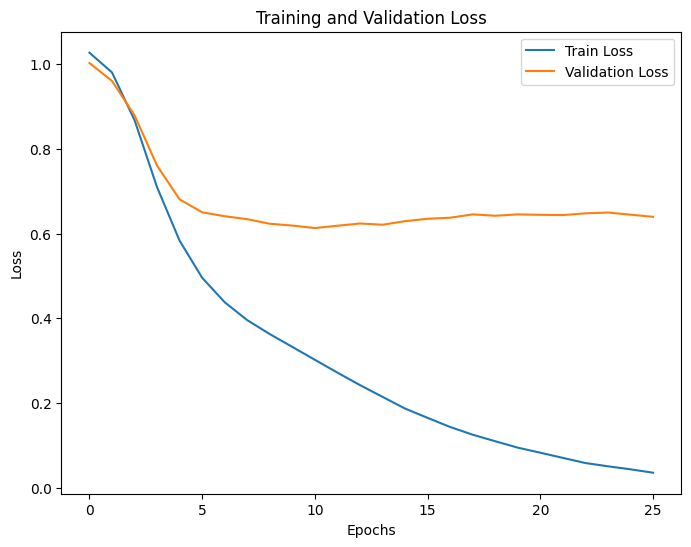

In [9]:
import matplotlib.pyplot as plt
# 繪製 Loss 曲線
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
# 計算測試集的 reconstruction error
def compute_reconstruction_error(model, data):
    reconstructed = model.predict(data)
    errors = np.mean(np.square(data - reconstructed), axis=1)
    return errors

# 計算正常測試數據的 reconstruction error
normal_errors = compute_reconstruction_error(model, test_data)

# 計算所有數據的 reconstruction error 來找 threshold
all_errors = compute_reconstruction_error(model, scaler.transform(datas))

36/36 [==============================] - 0s 1ms/step


In [ ]:
normal_errors

array([0.65015078, 0.616713  , 0.65827746, 0.61443748, 0.59584159,
       0.60060386, 0.63999925, 0.7290837 , 0.6203921 , 0.65862961,
       0.68337287, 0.64984345, 0.64744346, 0.76728349, 0.610387  ,
       0.55728806, 0.76542978, 0.66774701, 0.58650942, 0.63880016,
       0.62247752, 0.58334974, 0.56857548])

In [13]:
all_errors

array([  3.92552682,   5.70551517,   4.64934588, ...,  64.74090632,
       109.82620741,  71.68513044])

ROC-AUC: 1.0000
PR-AUC: 1.0000


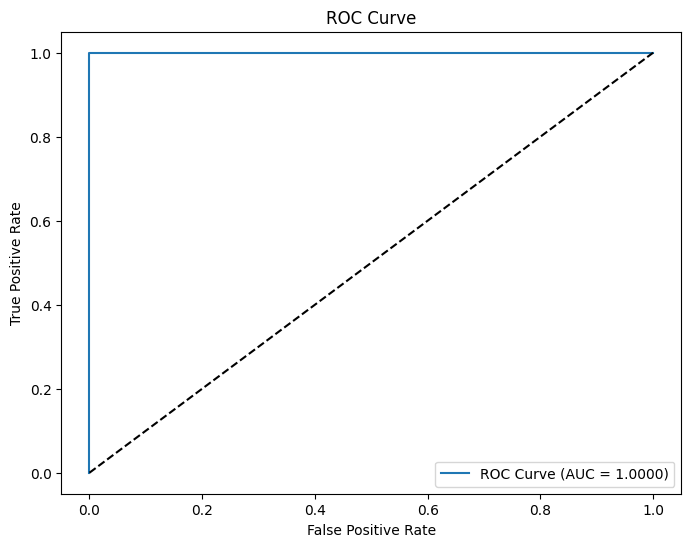

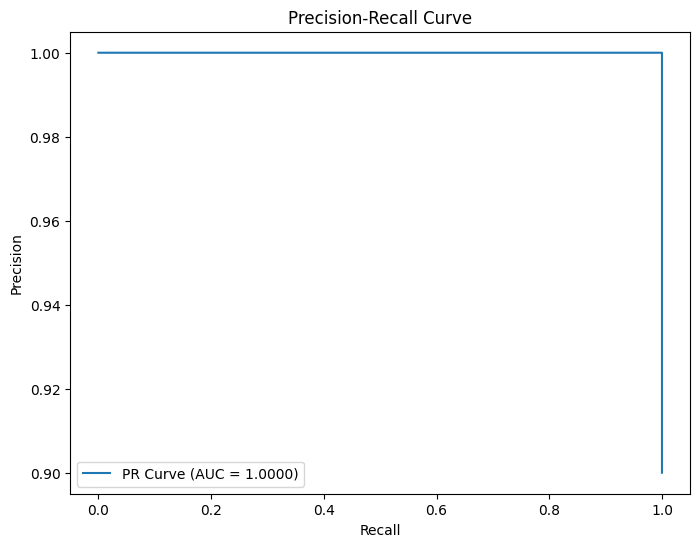

In [ ]:
from sklearn.metrics import roc_auc_score, average_precision_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

# 設定 threshold（例如 95% 分位數）
threshold = np.percentile(all_errors[labels == 'Normal'], 95)

# 根據 reconstruction error 來標記 novelty
detections = all_errors > threshold

# 計算 ROC-AUC 和 PR-AUC
y_true = (labels != 'Normal').astype(int)
roc_auc = roc_auc_score(y_true, all_errors)
pr_auc = average_precision_score(y_true, all_errors)

print(f"ROC-AUC: {roc_auc:.4f}")
print(f"PR-AUC: {pr_auc:.4f}")

# 繪製 ROC 曲線
fpr, tpr, _ = roc_curve(y_true, all_errors)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 繪製 PR 曲線
precision, recall, _ = precision_recall_curve(y_true, all_errors)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()